<a href="https://colab.research.google.com/github/blacksaturn1-wpi/Reinforcement-Learning-RBE-595-WPI/blob/assignment-1/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create graph of:
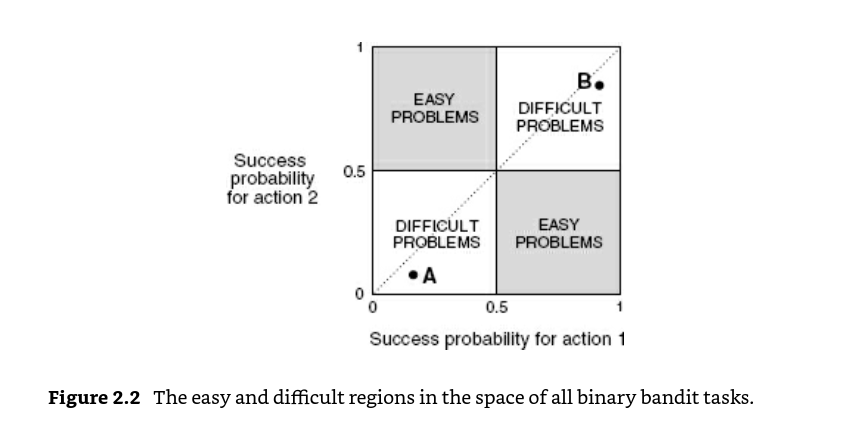


The difference between evaluative feedback and instructive information remains significant even if there are only two actions and two possible rewards. For these binary bandit tasks, let us call the two rewards success and failure. If you received success, then you might reasonably infer that whatever action you selected was correct, and if you received failure, then you might infer that whatever action you did not select was correct. You could then keep a tally of how often each action was (inferred to be) correct and select the action that was correct most often.  often. Let us call this the supervised algorithm because it corresponds most closely to what a supervised learning method might do in the case of a single input pattern. If the rewards are deterministic, then the inferences of the supervised algorithm are all correct and it performs excellently. If the rewards are stochastic, then the picture is more complicated.


Sutton, Richard S.; Barto, Andrew G.. Reinforcement Learning (Adaptive Computation and Machine Learning series) (Kindle Locations 790-797). MIT Press. Kindle Edition. 

Run 2 main tests to graph Quadrant I and III.  Simulate 1000 runs and calculate the estimated value of the reward

Quadrant III Test:

*   Action 1 succeeds with probability of .2
*   Action 2 succeeds with probability of .1






In [36]:
def running_average(current_reward,current_average,previous_step):
  current_step=previous_step+1
  new_average = current_average + 1.0/current_step*(current_reward-current_average)
  return (new_average,current_step)

In [37]:
from random import choices
def testStochasticOutcomes():
  population = [0, 1]
  action1_weights = [0.8, 0.2]
  action2_weights = [0.9, 0.1]
  action1_reward=choices(population, action1_weights)
  action2_reward=choices(population, action2_weights)
  print(action1_reward[0])
  print(action2_reward[0])

In the stochastic case, a particular binary bandit task is defined by two numbers, the probabilities of success for each possible action. The space of all possible tasks is thus a unit square, as shown in Figure 2.2. The upper-left and lower-right quadrants correspond to relatively easy tasks for which the supervised algorithm would work well. For these, the probability of success for the better action is greater than 0.5 and the probability of success for the poorer action is less than 0.5. For these tasks, the action inferred to be correct (as described above) will actually be the correct action more than half the time. 
However, binary bandit tasks in the other two quadrants of Figure 2.2 are more difficult and cannot be solved effectively by the supervised algorithm. For example, consider a task with success probabilities 0.1 and 0.2, corresponding to point A in the lower-left difficult quadrant of Figure 2.2. Because both actions produce failure at least 80% of the time, any method that takes failure as an indication that the other action was correct will oscillate between the two actions, never settling on the better one.

Sutton, Richard S.; Barto, Andrew G.. Reinforcement Learning (Adaptive Computation and Machine Learning series) (Kindle Locations 797-808). MIT Press. Kindle Edition. 

In [38]:
def estimateActionValues(r1,r2,q1,q2,n1,n2):
  q1,n1=running_average(r1,q1,n1)
  print("action1_reward: {0}, action1_reward_avg: {1}, action1_reward_count: {2}".format(r1,q1,n1))
  q2,n2=running_average(r2,q2,n2)
  print("action2_reward: {0}, action2_reward_avg: {1}, action2_reward_count: {2}".format(r2,q2,n2))
  return q1,q2,n1,n2

In [39]:
def binaryBanditSimulation(action1_weights,action2_weights,population,iterations):
  actionChoice=1 # we start by choosing action 1
  action1_reward_avg=0
  action1_reward_count=0
  action2_reward_avg=0
  action2_reward_count=0

  # Seed
  action1_reward=choices(population, action1_weights)
  action1_reward_avg,action1_reward_count=running_average(action1_reward[0],action1_reward_avg,action1_reward_count)
  print("SEED: action1_reward: {0}, action1_reward_avg: {1}, action1_reward_count: {2}".format(action1_reward[0],action1_reward_avg,action1_reward_count))

  for x in range(iterations):
    # At each step we choose the action with the highest action_reward_avg
    # Since the action is stochastic, we use its probability to determine if it was successfull or not
    # If it was successfull, we assume the other action would not be and vice versa
    # We then update the action_reward_avg for both actions using the calculated reward of the chosen action and the implied reward of other action
    # repeat cycle
    print("Iteration {}".format(x+1))
    if action1_reward_avg >= action2_reward_avg:
      print("Chose Action 1: {} >= {}".format(action1_reward_avg,action2_reward_avg))
      action1_reward=choices(population, action1_weights)
      if(action1_reward==1):
        action1_reward_avg,action1_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(1,0,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
      else:
        action1_reward_avg,action2_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(0,1,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
    else:
      print("Chose Action 2: {} < {}".format(action1_reward_avg,action2_reward_avg))
      action2_reward=choices(population, action2_weights)
      if(action2_reward==1):
        action1_reward_avg,action2_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(0,1,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
      else:
        action1_reward_avg,action2_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(1,0,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
    

In [40]:
# Simulation of Lower Left Quadrant (Quadrant III)
population = [0, 1]
action1_weights = [0.8, 0.2]
action2_weights = [0.9, 0.1]
binaryBanditSimulation(action1_weights,action2_weights,population,2000)

Streaming output truncated to the last 5000 lines.
Iteration 751
Chose Action 1: 0.5 >= 0.5
action1_reward: 0, action1_reward_avg: 0.4993342210386152, action1_reward_count: 751
action2_reward: 1, action2_reward_avg: 0.5006657789613849, action2_reward_count: 751
Iteration 752
Chose Action 2: 0.4993342210386152 < 0.5006657789613849
action1_reward: 1, action1_reward_avg: 0.5, action1_reward_count: 752
action2_reward: 0, action2_reward_avg: 0.5, action2_reward_count: 752
Iteration 753
Chose Action 1: 0.5 >= 0.5
action1_reward: 0, action1_reward_avg: 0.49933598937583, action1_reward_count: 753
action2_reward: 1, action2_reward_avg: 0.50066401062417, action2_reward_count: 753
Iteration 754
Chose Action 2: 0.49933598937583 < 0.50066401062417
action1_reward: 1, action1_reward_avg: 0.5, action1_reward_count: 754
action2_reward: 0, action2_reward_avg: 0.5, action2_reward_count: 754
Iteration 755
Chose Action 1: 0.5 >= 0.5
action1_reward: 0, action1_reward_avg: 0.49933774834437084, action1_reward

Now consider a task with success probabilities 0.8 and 0.9, corresponding to point B in the upper-right difficult quadrant of Figure 2.2. In this case both actions produce success almost all the time. Any method that takes success as an indication of correctness can easily become stuck selecting the wrong action.

Sutton, Richard S.; Barto, Andrew G.. Reinforcement Learning (Adaptive Computation and Machine Learning series) (Kindle Locations 797-808). MIT Press. Kindle Edition. 

In [41]:
# Simulation of Upper Right Quadrant (Quadrant I)
population = [0, 1]
action1_weights = [0.2, 0.8]
action2_weights = [0.1, 0.9]
binaryBanditSimulation(action1_weights,action2_weights,population,2000)

Streaming output truncated to the last 5000 lines.
Iteration 751
Chose Action 1: 0.5 >= 0.5
action1_reward: 0, action1_reward_avg: 0.4993342210386152, action1_reward_count: 751
action2_reward: 1, action2_reward_avg: 0.5006657789613849, action2_reward_count: 751
Iteration 752
Chose Action 2: 0.4993342210386152 < 0.5006657789613849
action1_reward: 1, action1_reward_avg: 0.5, action1_reward_count: 752
action2_reward: 0, action2_reward_avg: 0.5, action2_reward_count: 752
Iteration 753
Chose Action 1: 0.5 >= 0.5
action1_reward: 0, action1_reward_avg: 0.49933598937583, action1_reward_count: 753
action2_reward: 1, action2_reward_avg: 0.50066401062417, action2_reward_count: 753
Iteration 754
Chose Action 2: 0.49933598937583 < 0.50066401062417
action1_reward: 1, action1_reward_avg: 0.5, action1_reward_count: 754
action2_reward: 0, action2_reward_avg: 0.5, action2_reward_count: 754
Iteration 755
Chose Action 1: 0.5 >= 0.5
action1_reward: 0, action1_reward_avg: 0.49933774834437084, action1_reward